 ## Nearest Neighbours & KMeans
 # Cluster similar Houses

Again, on the same dataset. Cluster similar houses together. Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt



1. Data cleaning & getting rid of irrelevant information before clustering
2. Finding the optimal value of k
3. Storing cluster to which the house belongs along with the data

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Problem statement:

- To Cluster similar Houses in our data and the data given with sqft, floor, total floor, bedroom, living room, bathroom and price(Target variable)
- Cluster similar Houses using KNearestNeighbour Regressor

In [2]:
# Load the data

data = pd.read_csv("house_rental_data.csv")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data.nunique()

Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64

# 1. Data cleaning & getting rid of irrelevant information before clustering

In [8]:
#  Check for missing values

data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [11]:
data.dropna()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [12]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [13]:
# feature scaling:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [14]:
# Select relevant features for clustering

features_for_clustering = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']

In [16]:
data_scaled = pd.DataFrame(ss.fit_transform(data[features_for_clustering]), columns=features_for_clustering)
data_scaled

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,-0.456393,-1.014897,-0.772347,-0.828956,0.402694,0.276918
1,0.791798,-0.242042,-0.772347,1.151328,0.402694,0.276918
2,-0.507434,-0.242042,-0.772347,-0.828956,0.402694,-1.187117
3,-0.089824,-1.014897,-0.772347,0.161186,0.402694,0.276918
4,-0.730160,1.303669,0.629803,0.161186,0.402694,0.276918
...,...,...,...,...,...,...
640,-0.219747,0.273195,0.830110,0.161186,0.402694,0.276918
641,-1.500419,-0.499660,-0.171426,-1.819099,-1.761785,-1.187117
642,-1.027127,1.818907,0.629803,-1.819099,-1.761785,-1.187117
643,0.234984,-0.757279,0.629803,0.161186,0.402694,0.276918


# 2. Finding the optimal value of k

In [17]:
from sklearn.cluster import KMeans

In [18]:
# Define a range of k values to try
k_values = range(1, 11)

In [19]:
# List to store inertia values for each k
inertia_values = []

In [20]:
# Perform KMeans clustering for each k
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(data_scaled)
    inertia_values.append(kmeans_model.inertia_)

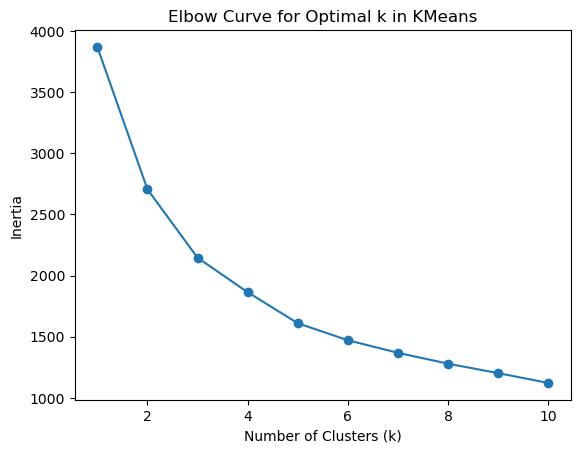

In [21]:
# Plot the Elbow Curve to find the optimal k

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal k in KMeans')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 3. Storing cluster to which the house belongs along with the data

In [22]:
# Choose the optimal k based on the Elbow Curve 
optimal_k = 3

In [23]:
# Perform KMeans clustering with the optimal k

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [24]:
data['Cluster'] = kmeans_model.fit_predict(data_scaled)
data['Cluster']

0      1
1      1
2      0
3      1
4      2
      ..
640    2
641    0
642    0
643    1
644    1
Name: Cluster, Length: 645, dtype: int32

In [26]:
# Display the first few rows with cluster assignments

data[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Cluster']]
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
0,1177.698,2,7,2,2,2,62000,1
1,2134.800,5,7,4,2,2,78000,1
2,1138.560,5,7,2,2,1,58000,0
3,1458.780,2,7,3,2,2,45000,1
4,967.776,11,14,3,2,2,45000,2


In [27]:
data['Cluster'].max()

2